In [1]:
import pandas as pd
#import modin.pandas as mpd
import os
import numpy as np
from hyperimpute.plugins.imputers import Imputers
from hyperopt import hp
from composer.algorithms import FusedLayerNorm
from composer import Trainer
from shaphypetune import BoostSearch, BoostRFE, BoostRFA, BoostBoruta
from xgboost import XGBClassifier
import xgboost

import taichi as ti
import taichi.math as tm
os.environ["MODIN_CPUS"] = "12"

C:\Users\subar\anaconda3\envs\d\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


[Taichi] version 1.4.1, llvm 15.0.1, commit e67c674e, win, python 3.9.15


In [10]:
#using dart can boost performance of XGboost
param = {'booster': 'dart',
         'max_depth': 15 + hp.randint('num_leaves', 5), 'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),#0.1,
         'objective': 'binary:logistic',
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'skip_drop': 0.5}
param['gpu_id'] = 0
param['tree_method'] = 'gpu_hist'

In [4]:
from tigramite.independence_tests import GPDC
from fpcmci.CPrinter import CPLevel
from fpcmci.FPCMCI import FPCMCI
from fpcmci.preprocessing.data import Data
from fpcmci.preprocessing.subsampling_methods.Static import Static
from fpcmci.preprocessing.subsampling_methods.SubsamplingMethod import SubsamplingMethod
from fpcmci.preprocessing.subsampling_methods.WSDynamic import WSDynamic
from fpcmci.preprocessing.subsampling_methods.WSFFTStatic import WSFFTStatic
from fpcmci.preprocessing.subsampling_methods.WSStatic import WSStatic
from fpcmci.selection_methods.TE import TE, TEestimator
from fpcmci.basics.constants import LabelType

[Errno 2] No such file or directory: 'C:\\Users\\subar\\anaconda3\\envs\\d\\lib\\site-packages\\tigramite\\independence_tests\\..\\..\\versions.py'


[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


[Errno 2] No such file or directory: 'C:\\Users\\subar\\anaconda3\\envs\\d\\lib\\site-packages\\tigramite\\independence_tests\\..\\..\\versions.py'


In [5]:
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from tigramite.models import LinearMediation, Prediction

[Errno 2] No such file or directory: 'C:\\Users\\subar\\anaconda3\\envs\\d\\lib\\site-packages\\tigramite\\..\\versions.py'
[Errno 2] No such file or directory: 'C:\\Users\\subar\\anaconda3\\envs\\d\\lib\\site-packages\\tigramite\\..\\versions.py'


In [17]:
#this shows a feature of XGboost that allows one to encode priors in the form of contraints on the data being fitted

params_constrained = param.copy()
params_constrained['monotone_constraints'] = {"f0": 1, "f2": -1}#(1,-1)

model_with_constraints = xgboost.train(params_constrained, dtrain,
                                   num_boost_round = 1000, evals = evallist,
                                   early_stopping_rounds = 10)



NameError: name 'dtrain' is not defined

In [ ]:
param_dist_hyperopt = {
    'booster': 'dart',
    'max_depth': 15 + hp.randint('num_leaves', 5), 
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0)
}

In [11]:
import quandl
sentiment =quandl.get("UMICH/SOC1", authtoken="DNMZo2iRzVENxpxqHBKF", transform="rdiff", collapse="quarterly", start_date="2019-08-01", end_date="2022-09-30")
print(sentiment )

               Index
Date                
2019-12-31  0.065451
2020-03-31 -0.102719
2020-06-30 -0.123457
2020-09-30  0.029449
2020-12-31  0.003731
2021-03-31  0.052045
2021-06-30  0.007067
2021-09-30 -0.148538
2021-12-31 -0.030220
2022-03-31 -0.158640
2022-06-30 -0.158249
2022-09-30  0.172000


In [10]:
train = pd.read_csv('D:\\KaggleData\\microbuisness\\train.csv')
census = pd.read_csv('D:\\KaggleData\\microbuisness\\census_starter.csv')
print(train)
print(122265/56045)
print(train.head(0))
print(census.head(0))
cols = census.columns

plugin = Imputers().get("miracle")

#train = plugin.fit_transform(train)
#census = census.drop(['cfips'],1)
#trainn = train
#print(census.head(5))
#trainn = trainn.merge(census, 'right',on='cfips')
#trainn = pd.concat([train,census],1)
#trainn = trainn.fillna(method='ffill')
#print(trainn.head(5))

                  row_id  cfips  ... microbusiness_density active
0        1001_2019-08-01   1001  ...              3.007682   1249
1        1001_2019-09-01   1001  ...              2.884870   1198
2        1001_2019-10-01   1001  ...              3.055843   1269
3        1001_2019-11-01   1001  ...              2.993233   1243
4        1001_2019-12-01   1001  ...              2.993233   1243
...                  ...    ...  ...                   ...    ...
122260  56045_2022-06-01  56045  ...              1.803249    101
122261  56045_2022-07-01  56045  ...              1.803249    101
122262  56045_2022-08-01  56045  ...              1.785395    100
122263  56045_2022-09-01  56045  ...              1.785395    100
122264  56045_2022-10-01  56045  ...              1.785395    100

[122265 rows x 7 columns]
2.181550539744848
Empty DataFrame
Columns: [row_id, cfips, county, state, first_day_of_month, microbusiness_density, active]
Index: []
Empty DataFrame
Columns: [pct_bb_2017, pct_bb_

In [219]:

from matplotlib import pyplot as plt
%matplotlib inline     

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.lpcmci import LPCMCI
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr #, GPDC, CMIknn, CMIsymb

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [92]:
import numpy as np
from frouros.detectors.data_drift import KSTest

detector = KSTest()
y = train['active']
t = y.head(39)
te = t.tail(20)
t = t.head(19)
t = np.array(t)
te = np.array(te)
detector.fit(X=t)
statistic, p_value = detector.compare(X=te)
print(statistic)

StatisticalResult(statistic=0.95, p_value=5.803555641539876e-10)


In [4]:
from scipy import signal
from scipy import integrate
dd = np.ravel(dat)#data_to_predict)
p,f = signal.periodogram(a)
a = integrate.cumtrapz(f,np.sqrt(p),0)
plt.plot(a)

NameError: name 'dat' is not defined

In [2]:
import taichi as ti
ti.init(arch=ti.cpu)

@ti.func
def inv_square(x):  # A Taichi function
    return 1.0 / (x * x)

@ti.kernel
def partial_sum(n: int) -> float:  # A kernel
    total = 0.0
    for i in range(1, n + 1):
        total += inv_square(n)
    return total
partial_sum(30)

[Taichi] Starting on arch=x64


0.03333332762122154

In [8]:

train = train.fillna(0)
dat = train.head(30)
print(dat)
a = dat['microbusiness_density']
b = dat['active']
dat = pd.concat([a,b],1)
dat = np.array(dat)
#dat = scalar.fit_transform(dat)
N = dat.shape[1]
var_names = [r'$X^{%d}$' % j for j in range(N)]
dat = pp.DataFrame(dat,var_names=var_names)
tp.plot_timeseries(dat, figsize=(15, 5));
plt.show()
parcorr = ParCorr(significance='analytic')

# Create a PCMCI object, passing the the dataframe and (conditional)
# independence test object.
pcmci = PCMCI(dataframe=dat, 
              cond_ind_test=parcorr,
              verbosity=1)
    
correlations = pcmci.run_bivci(tau_max=12, val_only=True)['val_matrix']
setup_args = {'var_names':var_names,
              'figsize':(15, 6),
              'x_base':5,
              'y_base':.5}
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, 
                                   setup_args=setup_args)
    
lpcmci = LPCMCI(dataframe=dat, 
                cond_ind_test=parcorr,
                verbosity=1)

# Define the analysis parameters.
tau_max = 12 #number of time steps into the past to consider
pc_alpha = 0.05 #i am guessing this is significance
    
# Run LPCMCI
results = lpcmci.run_lpcmci(tau_max=tau_max,
                                pc_alpha=pc_alpha)
#lpcmci.print_significant_links()

plt.show()
# Plot time series graph
print("val_matrix")
print(results['val_matrix'])# Estimated matrix of test statistic values regarding adjacencies.
print("p-values")
print(results['p_matrix']) #the significance of said links
print("graph")
print(results['graph']) #the directional links 
#x = x.fillna(0)
#y = y.fillna(0)
#x = np.squeeze(x)
#y = np.squeeze(y)
#corr, _ = stats.pearsonr(x, y)
#print(corr)
#print('Pearsons correlation: %.3f' % corr)
tp.plot_time_series_graph(
    figsize=(10, 10),
    node_size=0.05,
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); 

[Taichi] Starting on arch=cuda
             row_id  cfips  ... microbusiness_density active
0   1001_2019-08-01   1001  ...              3.007682   1249
1   1001_2019-09-01   1001  ...              2.884870   1198
2   1001_2019-10-01   1001  ...              3.055843   1269
3   1001_2019-11-01   1001  ...              2.993233   1243
4   1001_2019-12-01   1001  ...              2.993233   1243
5   1001_2020-01-01   1001  ...              2.969090   1242
6   1001_2020-02-01   1001  ...              2.909326   1217
7   1001_2020-03-01   1001  ...              2.933231   1227
8   1001_2020-04-01   1001  ...              3.000167   1255
9   1001_2020-05-01   1001  ...              3.004948   1257
10  1001_2020-06-01   1001  ...              3.019292   1263
11  1001_2020-07-01   1001  ...              3.083837   1290
12  1001_2020-08-01   1001  ...              3.174679   1328
13  1001_2020-09-01   1001  ...              3.205756   1341
14  1001_2020-10-01   1001  ...              3.193804 

TaichiTypeError: 
File "C:\Users\subar\AppData\Local\Temp\ipykernel_9852\3079493028.py", line 9, in a:
    a = dat['microbusiness_density']
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Invalid constant scalar data type: <class 'pandas.core.series.Series'>

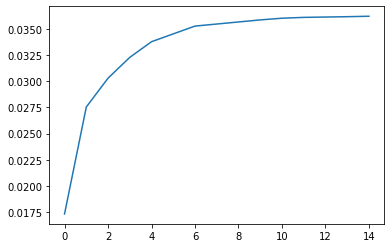

In [32]:
from scipy import signal
from scipy import integrate

#dat = dat['microbusiness_density']
dd = np.ravel(a)#data_to_predict)
p,f = signal.periodogram(a)
a = integrate.cumtrapz(f,np.sqrt(p),0)
plt.plot(a)

In [27]:
from neuralforecast.utils import AirPassengersDF

Y_df = AirPassengersDF
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31'] # 12 test

print(Y_df.head(5))

   unique_id         ds      y
0        1.0 1949-01-31  112.0
1        1.0 1949-02-28  118.0
2        1.0 1949-03-31  132.0
3        1.0 1949-04-30  129.0
4        1.0 1949-05-31  121.0


In [28]:
print(train.time)

0          0
1          1
2          2
3          3
4          4
          ..
122260    34
122261    35
122262    36
122263    37
122264    38
Name: time, Length: 122265, dtype: int32


In [7]:
from forward_forward import train_with_forward_forward_algorithm
import os
import torch

In [220]:
import quandl
import pandas as pd
import numpy as np
import time
#import dimod
#import openai
import networkx as nx
from sklearn.impute import SimpleImputer
from numba import jit
#from dimod import Binary, Integer, ConstrainedQuadraticModel
from sklearn import datasets
from scipy.special import beta
from pgmpy.factors.continuous import ContinuousFactor, RoundingDiscretizer, CanonicalDistribution#,ContinuousNode
from pgmpy.factors.distributions import GaussianDistribution as JGD
from pgmpy.models import BayesianModel
from sklearn.preprocessing import KBinsDiscretizer #this library turns continuous into discrete
from pgmpy.models.BayesianModel import BayesianModel, BayesianNetwork
from hyperspy.signals import Signal1D,Signal2D
from pgmpy.inference import CausalInference
#from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.metrics import correlation_score
from pgmpy.estimators import ParameterEstimator,BayesianEstimator, BDeuScore, K2Score, BicScore, ExhaustiveSearch
from pgmpy.independencies.Independencies import IndependenceAssertion
from pgmpy.estimators import TreeSearch
from pgmpy.estimators import ExpectationMaximization as EM
from hyperspy.signals import Signal1D,Signal2D
import matplotlib.pyplot as plt 
from pgmpy.metrics import log_likelihood_score
#from causality.inference.search import IC
#from causality.inference.independence_tests import RobustRegressionTest
import bnlearn as bn
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.independence_tests import ParCorr, GPDC, CMIknn, CMIsymb
from tigramite.models import LinearMediation, Prediction
from pyro.contrib.cevae import CEVAE as CEVAE
from sklearn.model_selection import train_test_split
import pyro.distributions as dist
from sklearn.decomposition import PCA
import torch
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE, Isomap
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats
from causalimpact import CausalImpact

INFO:hyperspy.extensions:Enabling extension hyperspy-gui-traitsui


Idea: what if instead of feeding the time series we take a shapelet of the most representative section of the input data and then do syntetic time series augmentation on it??

In [7]:
print(census)
census = np.array(census)

        0     1     2     3     4   ...       21       22       23       24       25
0     76.6  78.9  80.6  82.7  85.5  ...  55317.0  58786.0  58731.0  57982.0  62660.0
1     74.5  78.1  81.8  85.1  87.9  ...  52562.0  55962.0  58320.0  61756.0  64346.0
2     57.2  60.4  60.5  64.6  64.6  ...  33368.0  34186.0  32525.0  34990.0  36422.0
3     62.0  66.1  69.2  76.1  74.6  ...  43404.0  45340.0  47542.0  51721.0  54277.0
4     65.8  68.5  73.0  79.6  81.0  ...  47412.0  48695.0  49358.0  48922.0  52830.0
...    ...   ...   ...   ...   ...  ...      ...      ...      ...      ...      ...
3137  82.2  82.4  84.0  86.7  88.4  ...  71083.0  73008.0  74843.0  73384.0  76668.0
3138  83.5  85.9  87.1  89.1  90.5  ...  80049.0  83831.0  84678.0  87053.0  94498.0
3139  83.8  88.2  89.5  91.4  90.6  ...  54672.0  58235.0  63403.0  72458.0  75106.0
3140  76.4  78.3  78.2  82.8  85.4  ...  51362.0  53426.0  54158.0  57306.0  62271.0
3141  71.1  73.3  76.8  79.7  81.3  ...  59605.0  52867.0  57031.

In [29]:
census = pd.DataFrame(census,columns=["pct_bb_2017", "pct_bb_2018", "pct_bb_2019", "pct_bb_2020", "pct_bb_2021", "cfips", "pct_college_2017", "pct_college_2018", "pct_college_2019", "pct_college_2020", "pct_college_2021", "pct_foreign_born_2017", "pct_foreign_born_2018", "pct_foreign_born_2019", "pct_foreign_born_2020", "pct_foreign_born_2021", "pct_it_workers_2017", "pct_it_workers_2018", "pct_it_workers_2019", "pct_it_workers_2020", "pct_it_workers_2021", "median_hh_inc_2017", "median_hh_inc_2018", "median_hh_inc_2019", "median_hh_inc_2020", "median_hh_inc_2021"])
print(census)

      pct_bb_2017  pct_bb_2018  ...  median_hh_inc_2020  median_hh_inc_2021
0             NaN          NaN  ...                 NaN                 NaN
1             NaN          NaN  ...                 NaN                 NaN
2             NaN          NaN  ...                 NaN                 NaN
3             NaN          NaN  ...                 NaN                 NaN
4             NaN          NaN  ...                 NaN                 NaN
...           ...          ...  ...                 ...                 ...
3137          NaN          NaN  ...                 NaN                 NaN
3138          NaN          NaN  ...                 NaN                 NaN
3139          NaN          NaN  ...                 NaN                 NaN
3140          NaN          NaN  ...                 NaN                 NaN
3141          NaN          NaN  ...                 NaN                 NaN

[3142 rows x 26 columns]


In [81]:
from pyrqa.time_series import TimeSeries
from pyrqa.settings import Settings
from pyrqa.analysis_type import Classic
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
#from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse

In [93]:
a = train['microbusiness_density']
closee = a.tail(39)

time_series = TimeSeries(closee,
                           embedding_dimension=2,
                           time_delay=2)
settings = Settings(time_series,
                      analysis_type=Classic,
                      neighbourhood=FixedRadius(0.65),
                      similarity_measure=EuclideanMetric,
                      theiler_corrector=1)
computation = RQAComputation.create(settings,
                                      verbose=True)
result = computation.run()
print(result)

#microbusiness density has high recurrence rate and high determinism

[Platform 'NVIDIA CUDA']
Vendor: NVIDIA Corporation
Version: OpenCL 3.0 CUDA 12.0.94
Profile: FULL_PROFILE
Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_3d_image_writes cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_d3d10_sharing cl_khr_d3d10_sharing cl_nv_d3d11_sharing cl_nv_copy_opts cl_nv_create_buffer cl_khr_int64_base_atomics cl_khr_int64_extended_atomics cl_khr_device_uuid cl_khr_pci_bus_info cl_khr_external_semaphore cl_khr_external_memory cl_khr_external_semaphore_win32 cl_khr_external_memory_win32


[Device 'NVIDIA GeForce RTX 3070 Ti Laptop GPU']
Vendor: NVIDIA Corporation
Type: 4
Version: OpenCL 3.0 CUDA
Profile: FULL_PROFILE
Max Clock Frequency: 1410
Global Mem Size: 8589410304
Address Bits: 64
Max Compute Units: 46
Max Work Group Size: 1024
Max Work Item Dimension

In [8]:
a = train['active']
a = a.fillna(0)
closee = a.head(30)

time_series = TimeSeries(closee,
                           embedding_dimension=2,
                           time_delay=2)
settings = Settings(time_series,
                      analysis_type=Classic,
                      neighbourhood=FixedRadius(0.65),
                      similarity_measure=EuclideanMetric,
                      theiler_corrector=1)
computation = RQAComputation.create(settings,
                                      verbose=True)
result = computation.run()
print(result)

#active has a recurrence rate of 0.0357

[Platform 'NVIDIA CUDA']
Vendor: NVIDIA Corporation
Version: OpenCL 3.0 CUDA 12.0.94
Profile: FULL_PROFILE
Extensions: cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_3d_image_writes cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_d3d10_sharing cl_khr_d3d10_sharing cl_nv_d3d11_sharing cl_nv_copy_opts cl_nv_create_buffer cl_khr_int64_base_atomics cl_khr_int64_extended_atomics cl_khr_device_uuid cl_khr_pci_bus_info cl_khr_external_semaphore cl_khr_external_memory cl_khr_external_semaphore_win32 cl_khr_external_memory_win32


[Device 'NVIDIA GeForce RTX 3070 Ti Laptop GPU']
Vendor: NVIDIA Corporation
Type: 4
Version: OpenCL 3.0 CUDA
Profile: FULL_PROFILE
Max Clock Frequency: 1410
Global Mem Size: 8589410304
Address Bits: 64
Max Compute Units: 46
Max Work Group Size: 1024
Max Work Item Dimension

In [94]:
import nolds
h = nolds.hurst_rs(closee)
print(h)


0.722359497649243


In [95]:
from scipy import signal
from scipy import integrate

In [96]:
dd = np.ravel(closee)#data_to_predict)
p,f = signal.periodogram(dd)
a = integrate.cumtrapz(f,np.sqrt(p),0)

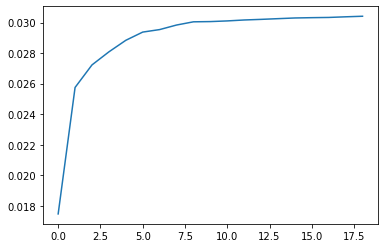

In [97]:
import matplotlib.pyplot as plt
plt.plot(a)

both microbusiness density and active appear to be consistent with a lorenz system

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))

C:\Users\subar\anaconda3\envs\d\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [98]:
import stumpy
import numpy as np
a = train.head(38)
m = 10
mp = stumpy.gpu_stump(a['microbusiness_density'], m)
motif_idx = np.argsort(mp[:, 0])[0]
print(motif_idx)
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

INFO:numba.cuda.cudadrv.driver:init
INFO:numba.cuda.cudadrv.driver:add pending dealloc: cuMemFree_v2 232 bytes
INFO:numba.cuda.cudadrv.driver:add pending dealloc: cuMemFree_v2 232 bytes
INFO:numba.cuda.cudadrv.driver:add pending dealloc: cuMemFree_v2 232 bytes
INFO:numba.cuda.cudadrv.driver:add pending dealloc: cuMemFree_v2 304 bytes
INFO:numba.cuda.cudadrv.driver:add pending dealloc: cuMemFree_v2 232 bytes
INFO:numba.cuda.cudadrv.driver:add pending dealloc: cuMemFree_v2 232 bytes
INFO:numba.cuda.cudadrv.driver:add pending dealloc: cuMemFree_v2 696 bytes
INFO:numba.cuda.cudadrv.driver:add pending dealloc: cuMemFree_v2 696 bytes


15
The nearest neighbor is located at index 25


Suspended We will resume work on this Saturday Febuary 4th 2023

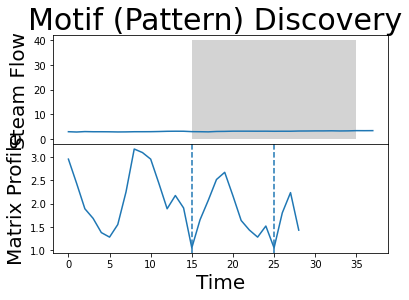

In [99]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(a['microbusiness_density'].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

In [18]:
import stumpy
import numpy as np
a = train.head(38)
m = 10
mp = stumpy.gpu_stump(a['active'].astype(np.float64), m)
motif_idx = np.argsort(mp[:, 0])[0]
print(motif_idx)

15


In [19]:
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 25


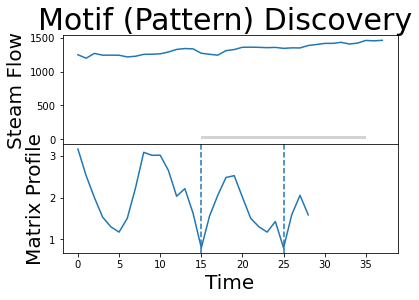

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(a['active'].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

In [100]:
L = 10
cac, regime_locations = stumpy.fluss(mp[:, 1], L=L, n_regimes=3, excl_factor=1)

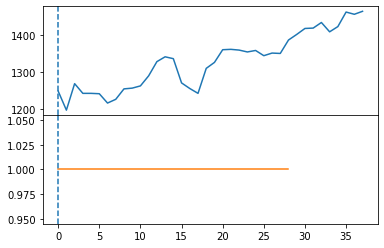

In [101]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(range(a['active'].shape[0]), a['active'].values)
axs[0].axvline(x=regime_locations[0], linestyle="dashed")
axs[1].plot(range(cac.shape[0]), cac, color='C1')
axs[1].axvline(x=regime_locations[0], linestyle="dashed")
plt.show()

no detectable regieme change

In [3]:
#X=np.array(train['microbusiness_density']).reshape(-1, 1)
#y=np.array(train['active']).reshape(-1, 1)
#scaler.fit(X=X,y=y)
#a = scaler.transform(X=X)
#b = scaler.transform(X=y)

columns = train.columns
print(columns)
b = train['microbusiness_density'].pct_change()
c = train['active']
#b = np.array(b)
print(b.shape)
print(c.shape)
#b = np.log(b)
c= np.log(c)
b = b.fillna(0)
print(b)
print(b.shape)
print(c.shape)
c = np.array(c)
#b = np.array(b)
#b = b.reshape(-1, 1)
c = c.reshape(-1, 1)

#rain = train.drop(['microbusiness_density','active'],1)

Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active'],
      dtype='object')
(122265,)
(122265,)
0         0.000000
1        -0.040833
2         0.059265
3        -0.020489
4         0.000000
            ...   
122260    0.000000
122261    0.000000
122262   -0.009901
122263    0.000000
122264    0.000000
Name: microbusiness_density, Length: 122265, dtype: float64
(122265,)
(122265,)


divide by zero encountered in log


both hurst and dfa seem to indicate that active exhibits long term dependence

usually data distributional shift is something that would need to be taken into account. However in this case since we only have monthly data over 2 years we do not need to account for this

In [ ]:
import quandl

x1 = quandl.get("YALE/SPCOMP", authtoken="DNMZo2iRzVENxpxqHBKF", transform="rdiff", collapse="monthly", start_date="1959-09-30", end_date="2020-09-30")
x2 = quandl.get("FRED/GDP", authtoken="DNMZo2iRzVENxpxqHBKF", transform="rdiff", collapse="monthly", start_date="1960-01-01", end_date="2021-03-31")
DESPAIR = quandl.get("USMISERY/INDEX", authtoken="DNMZo2iRzVENxpxqHBKF", transform="rdiff", collapse="monthly", start_date="1959-09-30", end_date="2020-09-30")
clf_xgb = XGBClassifier(n_estimators=150, random_state=0, verbosity=0, n_jobs=12)
model = BoostRFA(
    clf_xgb, param_grid=param_dist_hyperopt, min_features_to_select=1, step=1,
    n_iter=50, sampling_seed=0
)
BoostBoruta(estimator,alpha=0.05,verbose=1,n_jobs=12)
model.fit(
    X_regr_train, y_regr_train, trials=Trials(), 
    eval_set=[(X_regr_valid, y_regr_valid)], early_stopping_rounds=6, verbose=0
)

In [ ]:
BoostRFE(  
    estimator,                              # LGBModel or XGBModel
    min_features_to_select=None,            # the minimum number of features to be selected  
    step=1,                                 # number of features to remove at each iteration  
    param_grid=None,                        # parameters to be optimized  
    greater_is_better=False,                # minimize or maximize the monitored score  
    importance_type='feature_importances',  # which importance measure to use: default or shap  
    train_importance=True,                  # where to compute the shap feature importance  
    n_iter=None,                            # number of sampled parameter configurations  
    sampling_seed=None,                     # the seed used for parameter sampling  
    verbose=1,                              # verbosity mode  
    n_jobs=None                             # number of jobs to run in parallel  
)  

In [9]:
from gluonts.dataset.pandas import PandasDataset

from gluonts.mx import DeepAREstimator, Trainer, TemporalFusionTransformerEstimator
columns = train.columns
#train = pd.DataFrame(train)
#train = pd.concat([train,a,b],1,ignore_index=True)
train = pd.DataFrame(train,columns=columns)
print(train.head(0))
ds = PandasDataset.from_long_dataframe(train, target="active", item_id="cfips",feat_dynamic_cat=['county', 'state']) 

INFO:gluonts.mx.context:Using CPU


Empty DataFrame
Columns: [row_id, cfips, county, state, first_day_of_month, microbusiness_density, active]
Index: []


In [15]:
estimator = TemporalFusionTransformerEstimator(
    freq='M', prediction_length=1, trainer=Trainer(epochs=50,learning_rate=0.1,),
)
predictor = estimator.train(ds)

INFO:gluonts.trainer:Start model training
INFO:gluonts.trainer:Epoch[0] Learning rate is 0.1
100%|██████████| 50/50 [00:03<00:00, 16.54it/s, epoch=1/50, avg_epoch_loss=36.8]
INFO:gluonts.trainer:Epoch[0] Elapsed time 3.025 seconds
INFO:gluonts.trainer:Epoch[0] Evaluation metric 'epoch_loss'=36.824459
INFO:gluonts.trainer:Epoch[1] Learning rate is 0.1
100%|██████████| 50/50 [00:03<00:00, 13.92it/s, epoch=2/50, avg_epoch_loss=84.7]
INFO:gluonts.trainer:Epoch[1] Elapsed time 3.596 seconds
INFO:gluonts.trainer:Epoch[1] Evaluation metric 'epoch_loss'=84.730903
INFO:gluonts.trainer:Epoch[2] Learning rate is 0.1
100%|██████████| 50/50 [00:03<00:00, 14.18it/s, epoch=3/50, avg_epoch_loss=37.1]
INFO:gluonts.trainer:Epoch[2] Elapsed time 3.530 seconds
INFO:gluonts.trainer:Epoch[2] Evaluation metric 'epoch_loss'=37.095727
INFO:gluonts.trainer:Epoch[3] Learning rate is 0.1
100%|██████████| 50/50 [00:03<00:00, 14.06it/s, epoch=4/50, avg_epoch_loss=28.9]
INFO:gluonts.trainer:Epoch[3] Elapsed time 3.5

In [73]:
from gluonts.mx import DeepAREstimator, Trainer, TemporalFusionTransformerEstimator
"""
estimator = TemporalFusionTransformerEstimator(
    freq='M', prediction_length=1, trainer=Trainer(epochs=50)
)
predictor = estimator.train(ds)
"""

estimator = DeepAREstimator(
    freq='M', prediction_length=1, trainer=Trainer(epochs=3)
)
predictor = estimator.train(ds)


100%|██████████| 50/50 [00:01<00:00, 35.82it/s, epoch=3/3, avg_epoch_loss=-.488] 


In [85]:
from gluonts.evaluation import make_evaluation_predictions
test = pd.read_csv('D:\\KaggleData\\microbuisness\\test.csv')
test = PandasDataset.from_long_dataframe(train, item_id="cfips",feat_dynamic_cat=['county', 'state']) 
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test,  # test dataset
    predictor=predictor,  # predictor
    num_samples=10,  # number of sample paths we want for evaluation
)

In [87]:
import matplotlib.pyplot as plt

forecasts = list(forecast_it)
tss = list(ts_it)
#forecast_entry = forecasts[0]
#print(tss)
#plt.plot(forecast_entry)

KeyError: 'target'

In [18]:
print(train['first_day_of_month'].min())
print(train["first_day_of_month"].max())
print(122265/38)
#38 from 8/1/2019 to 10/1/2022

2019-08-01
2022-10-01


In [12]:
import numpy as np
import pandas as pd
date = np.tile(np.arange(38), 55044)
date = date.reshape(-1, 1)
date = pd.DataFrame(date,columns=['time'])
print(date)

         time
0           0
1           1
2           2
3           3
4           4
...       ...
2091667    33
2091668    34
2091669    35
2091670    36
2091671    37

[2091672 rows x 1 columns]


In [11]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping
import torch
from sklearn import preprocessing
from pytorch_forecasting import Baseline, NBeats, TimeSeriesDataSet, DecoderMLP
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting.data.examples import generate_ar_data
from pytorch_forecasting.metrics import SMAPE
from pytorch_forecasting import Baseline, DeepAR, TimeSeriesDataSet
from pytorch_forecasting.metrics import SMAPE, MultivariateNormalDistributionLoss
pl.seed_everything(42)
import pytorch_forecasting as ptf

Global seed set to 42


In [5]:
columns = train.columns
print(columns)

Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active'],
      dtype='object')


In [93]:
train['microbusiness_density'] = b
print()
#train['active'] = c
#print(train['active'])

In [13]:

from sklearn import preprocessing 

date = np.tile(np.arange(38), 55044)
print(date.reshape(-1, 1))
print(date.shape)
max_encoder_length = 38
max_prediction_length = 1
le = preprocessing.LabelEncoder()

columns = train.columns
print(columns)
train = pd.DataFrame(train,columns=columns)
print(train)
#train['first_day_of_month']
a = le.fit_transform(train['first_day_of_month'])#train['first_day_of_month'].replace("-","")
a = a.reshape(-1, 1)
#print(a.shape)
#print(a)#train['first_day_of_month'])
#train = plugin.fit_transform(train)
a = pd.DataFrame(a,columns=['time'])
train = train
a = a.astype(int)
train = pd.concat([train,a],1)

train =train.fillna(0)
print(train['time'])
#train = train['first_day_of_month'].strftime("%Y%m%d")
#train = train['first_day_of_month'].astype(int)
#np.tile(np.arange(10), 3)
#a = np.linspace(1001, 56045, num=55044)

#training_cutoff = train["first_day_of_month"].max() - max_prediction_length


[[ 0]
 [ 1]
 [ 2]
 ...
 [35]
 [36]
 [37]]
(2091672,)
Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active'],
      dtype='object')
                  row_id  cfips  ... microbusiness_density active
0        1001_2019-08-01   1001  ...              3.007682   1249
1        1001_2019-09-01   1001  ...              2.884870   1198
2        1001_2019-10-01   1001  ...              3.055843   1269
3        1001_2019-11-01   1001  ...              2.993233   1243
4        1001_2019-12-01   1001  ...              2.993233   1243
...                  ...    ...  ...                   ...    ...
122260  56045_2022-06-01  56045  ...              1.803249    101
122261  56045_2022-07-01  56045  ...              1.803249    101
122262  56045_2022-08-01  56045  ...              1.785395    100
122263  56045_2022-09-01  56045  ...              1.785395    100
122264  56045_2022-10-01  56045  ...              1.785395    100

[122265 rows x 7 colum

In [14]:
training = TimeSeriesDataSet(
    train,#[lambda x: x.time_idx <= training_cutoff],
    group_ids=["cfips"],
    time_idx="time",
    target="active",
    #categorical_encoders={["pct_bb_2017","pct_bb_2018","pct_bb_2019","pct_bb_2020","pct_bb_2021", "pct_college_2017", "pct_college_2018", "pct_college_2019", "pct_college_2020", "pct_college_2021","pct_foreign_born_2017","pct_foreign_born_2018","pct_foreign_born_2019","pct_foreign_born_2020","pct_foreign_born_2021","pct_it_workers_2017","pct_it_workers_2018","pct_it_workers_2019","pct_it_workers_2020","pct_it_workers_2021","median_hh_inc_2017","median_hh_inc_2018","median_hh_inc_2019","median_hh_inc_2020","median_hh_inc_2021"]: NaNLabelEncoder().fit(train)},
    #group_ids=["county", "state", "microbusiness_density"],
    # only unknown variable is "value" - and N-Beats can also not take any additional variables
    #static_reals=["pct_bb_2017","pct_bb_2018","pct_bb_2019","pct_bb_2020","pct_bb_2021", "pct_college_2017", "pct_college_2018", "pct_college_2019", "pct_college_2020", "pct_college_2021","pct_foreign_born_2017","pct_foreign_born_2018","pct_foreign_born_2019","pct_foreign_born_2020","pct_foreign_born_2021","pct_it_workers_2017","pct_it_workers_2018","pct_it_workers_2019","pct_it_workers_2020","pct_it_workers_2021","median_hh_inc_2017","median_hh_inc_2018","median_hh_inc_2019","median_hh_inc_2020","median_hh_inc_2021"],
    #static_reals=["pct_bb_2017","pct_bb_2018","pct_bb_2019","pct_bb_2020","pct_bb_2021", "pct_college_2017", "pct_college_2018", "pct_college_2019", "pct_college_2020", "pct_college_2021","pct_foreign_born_2017","pct_foreign_born_2018","pct_foreign_born_2019","pct_foreign_born_2020","pct_foreign_born_2021","pct_it_workers_2017","pct_it_workers_2018","pct_it_workers_2019","pct_it_workers_2020","pct_it_workers_2021","median_hh_inc_2017","median_hh_inc_2018","median_hh_inc_2019","median_hh_inc_2020","median_hh_inc_2021"],
    time_varying_unknown_reals=['active'],
    
    max_encoder_length=38,
    #max_prediction_length=prediction_length,
    min_prediction_length=1,
    predict_mode=False 
)

In [39]:


validation = TimeSeriesDataSet.from_dataset(training, train ,predict=True,)
batch_size = 18
# synchronize samples in each batch over time - only necessary for DeepVAR, not for DeepAR
train_dataloader = training.to_dataloader(
    train=True, batch_size=batch_size, num_workers=12, batch_sampler="synchronized"
)

val_dataloader = validation.to_dataloader(
    train=False, batch_size=batch_size, num_workers=12, batch_sampler="synchronized"
)


In [26]:
# calculate baseline absolute error
#actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
#baseline_predictions = Baseline().predict(val_dataloader)
#SMAPE()(baseline_predictions, actuals)

In [15]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping
import torch
from sklearn import preprocessing
from pytorch_forecasting import Baseline, NBeats, TimeSeriesDataSet
from pytorch_forecasting.data import NaNLabelEncoder
from pytorch_forecasting.data.examples import generate_ar_data
from pytorch_forecasting.metrics import SMAPE
from pytorch_forecasting import DeepAR,DecoderMLP
from pytorch_forecasting.metrics import SMAPE, MultivariateNormalDistributionLoss
pl.seed_everything(42)
import pytorch_forecasting as ptf

trainer = pl.Trainer(accelerator='gpu', devices=1,gradient_clip_val=1e-1)
net = DecoderMLP.from_dataset(training,learning_rate=3e-2, loss=SMAPE(quantiles=2) )
#net = DeepAR.from_dataset(training, learning_rate=3e-2, hidden_size=30, rnn_layers=2, loss=SMAPE()#MultivariateNormalDistributionLoss(rank=30))

Global seed set to 42


In [22]:
# find optimal learning rate
res = trainer.tuner.lr_find(
    net,
    train_dataloaders=train_dataloader,
    val_dataloaders=train_dataloader,
    min_lr=1e-5,
    max_lr=1e0,
    early_stop_threshold=100,
)
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()
net.hparams.learning_rate = res.suggestion()

`max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


RuntimeError: cannot reshape tensor of 0 elements into shape [-1, 0] because the unspecified dimension size -1 can be any value and is ambiguous

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS, LSTM
from neuralforecast.utils import AirPassengersDF
#from neuralforecast.losses.numpy import mae, mse,smape
from neuralforecast.losses.pytorch import SMAPE

In [4]:
Y_df = AirPassengersDF
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31'] # 12 test
print(Y_df.head(5))

   unique_id         ds      y
0        1.0 1949-01-31  112.0
1        1.0 1949-02-28  118.0
2        1.0 1949-03-31  132.0
3        1.0 1949-04-30  129.0
4        1.0 1949-05-31  121.0


In [9]:
print(train.head(0))

Empty DataFrame
Columns: [row_id, cfips, county, state, first_day_of_month, microbusiness_density, active]
Index: []


In [22]:
horizon = 9
trai = train
print(train.head(0))
trai['y'] = trai['active']
trai['unique_id'] = trai['cfips']
trai['ds'] = trai['time']
trai = trai.drop(['row_id', 'county', 'state','first_day_of_month','active','cfips','time'],1)
#census = pd.DataFrame(census,columns=["pct_bb_2017", "pct_bb_2018", "pct_bb_2019", "pct_bb_2020", "pct_bb_2021", "cfips", "pct_college_2017", "pct_college_2018", "pct_college_2019", "pct_college_2020", "pct_college_2021", "pct_foreign_born_2017", "pct_foreign_born_2018", "pct_foreign_born_2019", "pct_foreign_born_2020", "pct_foreign_born_2021", "pct_it_workers_2017", "pct_it_workers_2018", "pct_it_workers_2019", "pct_it_workers_2020", "pct_it_workers_2021", "median_hh_inc_2017", "median_hh_inc_2018", "median_hh_inc_2019", "median_hh_inc_2020", "median_hh_inc_2021"])
#print(census)
print(trai.head(0))
#tra= tra.merge(census, how='left',on='cfips')
print(trai.shape)

#tra = pd.concat([trai,census],1)
#print(tra.head(0))


#print(tra)

Empty DataFrame
Columns: [row_id, cfips, county, state, first_day_of_month, microbusiness_density, active, time, y, unique_id, ds]
Index: []
Empty DataFrame
Columns: [microbusiness_density, y, unique_id, ds]
Index: []
(122265, 4)


In [24]:
model = [LSTM(h=horizon,max_steps=500),NHITS(input_size=3 * horizon, h=horizon, max_epochs=50,scaler_type='standard',loss=SMAPE())]#,stat_exog_list = ["pct_college_2017", "pct_college_2018", "pct_college_2019", "pct_college_2020", "pct_college_2021", "pct_foreign_born_2017", "pct_foreign_born_2018", "pct_foreign_born_2019", "pct_foreign_born_2020", "pct_foreign_born_2021", "pct_it_workers_2017", "pct_it_workers_2018", "pct_it_workers_2019", "pct_it_workers_2020", "pct_it_workers_2021", "median_hh_inc_2017", "median_hh_inc_2018", "median_hh_inc_2019", "median_hh_inc_2020", "median_hh_inc_2021"])]#stat_exog_list=["pct_bb_2017", "pct_bb_2018", "pct_bb_2019", "pct_bb_2020", "pct_bb_2021"])]#,"pct_college_2017", "pct_college_2018", "pct_college_2019", "pct_college_2020", "pct_college_2021", "pct_foreign_born_2017", "pct_foreign_born_2018", "pct_foreign_born_2019", "pct_foreign_born_2020", "pct_foreign_born_2021", "pct_it_workers_2017", "pct_it_workers_2018", "pct_it_workers_2019", "pct_it_workers_2020", "pct_it_workers_2021", "median_hh_inc_2017", "median_hh_inc_2018", "median_hh_inc_2019", "median_hh_inc_2020", "median_hh_inc_2021"])]
nforecast = NeuralForecast(models=model, freq='M')
print(trai.head(0))
#print(train.head(39))
print(trai.shape)
nforecast.fit(df=trai,verbose=True)


Global seed set to 1
Global seed set to 1


Empty DataFrame
Columns: [microbusiness_density, y, unique_id, ds]
Index: []
(122265, 4)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [256]:
print(trai.head(0))

Empty DataFrame
Columns: [cfips, microbusiness_density, active, pct_bb_2017, pct_bb_2018, pct_bb_2019, pct_bb_2020, pct_bb_2021, pct_college_2017, pct_college_2018, pct_college_2019, pct_college_2020, pct_college_2021, pct_foreign_born_2017, pct_foreign_born_2018, pct_foreign_born_2019, pct_foreign_born_2020, pct_foreign_born_2021, pct_it_workers_2017, pct_it_workers_2018, pct_it_workers_2019, pct_it_workers_2020, pct_it_workers_2021, median_hh_inc_2017, median_hh_inc_2018, median_hh_inc_2019, median_hh_inc_2020, median_hh_inc_2021, time, y, unique_id, ds]
Index: []


In [9]:
horizon = 9
trai = train
print(trai.head(0))
trai['y'] = trai['microbusiness_density']
print(trai['cfips'])
trai['unique_id'] = trai['cfips']
trai['ds'] = trai['time']
trai = trai.drop(['row_id', 'county', 'state','first_day_of_month'],1)
#tra = plugin.fit_transform(tra)
#trai = trai.drop(["pct_college_2017", "pct_college_2018", "pct_college_2019", "pct_college_2020", "pct_college_2021", "pct_foreign_born_2017", "pct_foreign_born_2018", "pct_foreign_born_2019", "pct_foreign_born_2020", "pct_foreign_born_2021", "pct_it_workers_2017", "pct_it_workers_2018", "pct_it_workers_2019", "pct_it_workers_2020", "pct_it_workers_2021", "median_hh_inc_2017", "median_hh_inc_2018", "median_hh_inc_2019", "median_hh_inc_2020", "median_hh_inc_2021"],1)
#print(tra)
#print(tra.head(1))
print("asdf")
model = [LSTM(h=horizon,max_steps=500),NHITS(input_size=3 * horizon, h=horizon, max_epochs=50,scaler_type='standard',loss=SMAPE(),stat_exog_list = ["pct_college_2017", "pct_college_2018", "pct_college_2019", "pct_college_2020", "pct_college_2021", "pct_foreign_born_2017", "pct_foreign_born_2018", "pct_foreign_born_2019", "pct_foreign_born_2020", "pct_foreign_born_2021", "pct_it_workers_2017", "pct_it_workers_2018", "pct_it_workers_2019", "pct_it_workers_2020", "pct_it_workers_2021", "median_hh_inc_2017", "median_hh_inc_2018", "median_hh_inc_2019", "median_hh_inc_2020", "median_hh_inc_2021"])]#stat_exog_list=["pct_bb_2017", "pct_bb_2018", "pct_bb_2019", "pct_bb_2020", "pct_bb_2021"])]#,"pct_college_2017", "pct_college_2018", "pct_college_2019", "pct_college_2020", "pct_college_2021", "pct_foreign_born_2017", "pct_foreign_born_2018", "pct_foreign_born_2019", "pct_foreign_born_2020", "pct_foreign_born_2021", "pct_it_workers_2017", "pct_it_workers_2018", "pct_it_workers_2019", "pct_it_workers_2020", "pct_it_workers_2021", "median_hh_inc_2017", "median_hh_inc_2018", "median_hh_inc_2019", "median_hh_inc_2020", "median_hh_inc_2021"])]
nforecast = NeuralForecast(models=model, freq='M')
print(trai.head(0))
#print(train.head(39))
print(trai.shape)
nforecast.fit(df=trai,verbose=True)


Global seed set to 1
Global seed set to 1


Empty DataFrame
Columns: [row_id, cfips, county, state, first_day_of_month, microbusiness_density, active, time, y, unique_id, ds]
Index: []
0          1001
1          1001
2          1001
3          1001
4          1001
          ...  
122260    56045
122261    56045
122262    56045
122263    56045
122264    56045
Name: cfips, Length: 122265, dtype: int64
asdf
Empty DataFrame
Columns: [cfips, microbusiness_density, active, time, y, unique_id, ds]
Index: []
(122265, 7)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

AttributeError: 'NoneType' object has no attribute 'get_indexer'

In [43]:
horizon = 24 # day-ahead daily forecast
models = [NHITS(h = horizon,
                input_size = 5*horizon,
                futr_exog_list = ['gen_forecast', 'week_day'], # <- Future exogenous variables
                hist_exog_list = ['system_load'], # <- Historical exogenous variables
                stat_exog_list = ['market_0', 'market_1'], # <- Static exogenous variables
                scaler_type = 'robust')]

Tip

Global seed set to 1


NameError: name 'Tip' is not defined

In [146]:
Y_hat_df = nforecast.predict()

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [126]:
print(Y_hat_df.shape)
print(Y_hat_df.head(30))

(25080, 2)
           ds     NHITS
unique_id              
1001       39  3.468831
1001       40  3.476960
1001       41  3.487988
1001       42  3.526772
1001       43  3.544794
1001       44  3.551725
1001       45  3.568570
1001       46  3.584085
1003       39  8.364853
1003       40  8.343334
1003       41  8.356381
1003       42  8.462914
1003       43  8.455778
1003       44  8.445662
1003       45  8.447929
1003       46  8.495646
1005       39  1.241138
1005       40  1.247833
1005       41  1.250200
1005       42  1.256467
1005       43  1.262420
1005       44  1.265443
1005       45  1.268961
1005       46  1.277385
1007       39  1.291242
1007       40  1.289247
1007       41  1.295921
1007       42  1.312459
1007       43  1.316867
1007       44  1.320460


In [107]:
sub = pd.read_csv("C://Users//subar//Downloads//submission.csv")
print(sub.shape)
print(sub)

(25080, 2)
                 row_id  microbusiness_density
0       1001_2022-11-01               3.405280
1       1001_2022-12-01               3.423634
2       1001_2023-01-01               3.336825
3       1001_2023-02-01               1.167540
4       1001_2023-03-01               1.167540
...                 ...                    ...
25075  56045_2023-02-01               0.642844
25076  56045_2023-03-01               0.642844
25077  56045_2023-04-01               0.642844
25078  56045_2023-05-01               0.642844
25079  56045_2023-06-01               0.642844

[25080 rows x 2 columns]


In [147]:
Y = Y_hat_df
print(Y)
Y = Y.rename(columns={"NHITS": "microbusiness_density"})
Y = Y["microbusiness_density"]
Y = Y.reset_index(drop=True)
s = sub['row_id']
Y = pd.concat([s,Y],1)
print(Y)
#

           ds      LSTM     NHITS
unique_id                        
1001       39  3.462311  3.468831
1001       40  3.470444  3.476960
1001       41  3.479797  3.487988
1001       42  3.519812  3.526772
1001       43  3.532183  3.544794
...        ..       ...       ...
56045      42  1.826387  1.835799
56045      43  1.828968  1.834342
56045      44  1.831998  1.834118
56045      45  1.797360  1.835875
56045      46  1.766209  1.836159

[25080 rows x 3 columns]
                 row_id  microbusiness_density
0       1001_2022-11-01               3.468831
1       1001_2022-12-01               3.476960
2       1001_2023-01-01               3.487988
3       1001_2023-02-01               3.526772
4       1001_2023-03-01               3.544794
...                 ...                    ...
25075  56045_2023-02-01               1.835799
25076  56045_2023-03-01               1.834342
25077  56045_2023-04-01               1.834118
25078  56045_2023-05-01               1.835875
25079  56045_20

In [148]:
from pathlib import Path  
filepath = Path('C://Users//subar//OneDrive//Desktop//out2.csv')


Y.to_csv(filepath,index=False)

In [98]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=True, mode="min")
trainer = pl.Trainer(
    max_epochs=50,
    #gpus=0,
    accelerator='gpu', 
    devices=1,
    enable_model_summary=True,
    gradient_clip_val=0.1,
    callbacks=[early_stop_callback],
    limit_train_batches=50,
    enable_checkpointing=True,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [41]:
net = DecoderMLP.from_dataset(training,learning_rate=3e-2, loss=SMAPE(quantiles=2))#,logging_metrics=SMAPE())
"""
DeepAR.from_dataset(
    training,
    learning_rate=0.1,
    log_interval=10,
    log_val_interval=1,
    hidden_size=30,
    rnn_layers=2,
    loss=MultivariateNormalDistributionLoss(rank=30),
)
"""
trainer.fit(
    net,
    train_dataloaders=train_dataloader,
    val_dataloaders=train_dataloader#val_dataloader,
)

TypeError: `Trainer.fit()` requires a `LightningModule`, got: DecoderMLP

In [23]:

net = DecoderMLP.from_dataset(training,learning_rate=3e-2, loss=SMAPE(quantiles=2))#,logging_metrics=SMAPE())
"""
DeepAR.from_dataset(
    training,
    learning_rate=0.1,
    log_interval=10,
    log_val_interval=1,
    hidden_size=30,
    rnn_layers=2,
    loss=MultivariateNormalDistributionLoss(rank=30),
)
"""
trainer.fit(
    net,
    train_dataloaders=train_dataloader,
    val_dataloaders=train_dataloader#val_dataloader,
)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


RuntimeError: cannot reshape tensor of 0 elements into shape [-1, 0] because the unspecified dimension size -1 can be any value and is ambiguous

we are going to have to do some preprocessing to speed things along

first transformation to try is Percent difference followed by the log. we should also try minmax scalar on microbusiness density and active.

We should also see if we can use stumpy to find and a reprsentative shapelet

If we cannot meaningfully improve over shaphypetune we should consider using the tempral fusion transformer which is the only other deep transformer model capable of classification. We should use shaphypetune for feature addition

Note: we are given no useful input information for the timestep that they want us to predict over in the test set. We will need to use the training set to predict over the final time step 


In [ ]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_model = DecoderMLP.load_from_checkpoint(best_model_path)

In [ ]:
new_raw_predictions, new_x = best_model.predict(val_dataloader, mode="raw", return_x=True)
#trainer.predict(test)